In [1]:
! pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import openai
import time
from time import strftime
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def prompt(Q):
  tries = 0
  while tries<5:
    try:
      response = openai.ChatCompletion.create(
        model=mmodel,
        messages=Q,
        temperature=0.5,
        #max_tokens=tkn,
        frequency_penalty=0,
        presence_penalty=0,
        request_timeout=199
      )['choices'][0]['message']['content']
      break
    except Exception as e:
      tries = tries+1
      print(f"An error occurred {tries:d}th time: {e}")
  return(Q,response)

In [4]:
mmodel = "gpt-3.5-turbo-1106"
openai.api_key = "YOUR_API"

In [5]:
system = 'You follow instructions carefully, You only need to provide a specifc number of Yield Strength of given material in MPa unit. In your reply, only give me numbers, no other words'

# system = 'You follow instructions carefully, You only need to provide a specifc number of Yield Strength of given material in MPa unit. In your reply, only give me numbers, no other words'

In [6]:
dtime = strftime("%Y_%m_%d-%H%M%S")
filename = PROPERTY.replace(" ", "")+'_'+dtime+'.csv'
print(f"Saving to: {filename} and {filename.replace('csv','txt')}")

NameError: name 'PROPERTY' is not defined

In [7]:
sss = [{"role": "system", "content": system}]
tab = []
tab_clean = []
ur = 0
um = 0
i = 0

In [8]:
# load GTD
gtd_df = pd.read_csv('yield_strength_GTD.csv')
gtd_df

FileNotFoundError: [Errno 2] No such file or directory: 'yield_strength_GTD.csv'

In [ ]:
# feed the table
head = 100
table = str(gtd_df[['material', 'value']].head(head).astype(str))
gtd_list = list(gtd_df['material'])[head:]

visited = []
result = []
while True:
  if i < 1:
    qq = "Read the following table, it contants the true yield strength values of different materials" + table
  else:
    qq = "What is yield strength of " + gtd_list[i-1] + ", in unit of MPa. Response only with number, nothing else."

  try:
    sss.append({"role": "user", "content": qq})
    sss,ans = prompt(sss)
    sss.append({"role": "assistant", "content": ans})
  except UnboundLocalError:
    time.sleep(10)
    sss.append({"role": "user", "content": qq})
    sss,ans = prompt(sss)
    sss.append({"role": "assistant", "content": ans})

  with open(filename.replace('csv','txt'), 'a') as file:
    print("USER: "+qq, file=file)
    print("GPT : "+ans, file=file)

  if i >= 1:
    result.append(ans)
    visited.append(gtd_list[i-1])
  i += 1
  if i == 61:
    break

df_temp = pd.DataFrame({'Materials': visited, 'Values': result})
print(df_temp)

In [ ]:
df_temp

,Materials,Values
0,Co25Ni25Fe25Al7.5Cu17.5,342.0
1,(CoCrFeNi) HEA,1262.0
2,(FeCoNiCr)94Ti2Al4 HEA,1262.0
3,FeNiMnAlCr HEA (with 1.1 at. %% carbon),315.0
4,CoCrFeMnNi (larger grain size),250.0
5,tHEA-Mo,250.0
6,Mo alloyed FeCoCrNi high entropy alloy,250.0
7,CrCoNi (77 K),250.0
8,CrMnFeCoNi (77 K),250.0
9,CrCoNi (293 K),250.0


In [ ]:
gtd_value = list(gtd_df['value'])[head:]

error = []
for i in range(len(result)):
    try:
        val = int(result[i].split()[0])
        error.append(abs(val - gtd_value[i]) / gtd_value[i])
    except:
        error.append(-1)
print("Total:", len(visited))
print("Known:", len(visited)-error.count(-1))
filtered_list = [x for x in error if x <= 0.1]
print("# of correct:", len(filtered_list))
filtered_list = [x for x in error if x != -1.0]
print("Average precentage of error:", sum(filtered_list) / len(filtered_list))
df = pd.DataFrame({'Materials': visited, 'Errors': error})
df

Total: 60
Known: 35
# of correct: 27
Average precentage of error: 787.7167199711504


,Materials,Errors
0,Co25Ni25Fe25Al7.5Cu17.5,-1.000000
1,(CoCrFeNi) HEA,-1.000000
2,(FeCoNiCr)94Ti2Al4 HEA,-1.000000
3,FeNiMnAlCr HEA (with 1.1 at. %% carbon),-1.000000
4,CoCrFeMnNi (larger grain size),-1.000000
5,tHEA-Mo,-1.000000
6,Mo alloyed FeCoCrNi high entropy alloy,-1.000000
7,CrCoNi (77 K),-1.000000
8,CrMnFeCoNi (77 K),-1.000000
9,CrCoNi (293 K),-1.000000


In [ ]:
# check_list = list(df['Material'])
# gen_value = list(df['Value'])
# gtd_list = list(gtd_df['material'])
# gtd_value = list(gtd_df['value'])

# err = []
# for m in check_list:
#     if m.strip() in gtd_list:
#         val = gen_value[check_list.index(m)]
#         cor = gtd_value[gtd_list.index(m.strip())]
#         err.append(abs(val - cor) / cor)
#     else:
#         material = m.strip()
#         found = False
#         for gtd in gtd_list:
#             if material in gtd:
#                 prev_idx = gtd.index(material) - 1
#                 next_idx = gtd.index(material) + len(material)
#                 if prev_idx > 0 and (gtd[prev_idx].isalpha() or gtd[prev_idx].isdigit()):
#                     continue
#                 if next_idx < len(gtd) and (gtd[next_idx].isalpha() or gtd[next_idx].isdigit()):
#                     continue
#                 val = gen_value[check_list.index(m)]
#                 cor = gtd_value[gtd_list.index(gtd)]
#                 err.append(abs(val - cor) / cor)
#                 found = True
#                 break
#         if not found:
#             err.append(-1)

# print("Total:", len(check_list))
# print("Found:", len(err) - err.count(-1))
# print("Unkdown:", err.count(-1))
# cor = [x for x in err if x <= 0.1]
# print("# of correct:", len(cor))
# for i in range(len(err)):
#     if err[i] == -1:
#         err[i] = None

# result_df = pd.DataFrame({
#     "Material": check_list,
#     "precentage of error": err
# })
# result_df

Text(0, 0.5, 'Frequency')

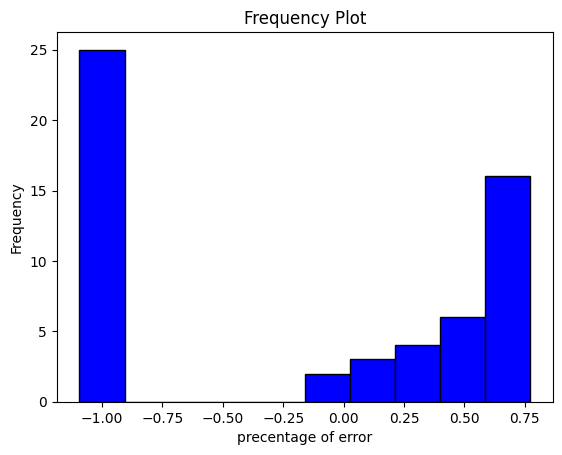

In [ ]:
data =  [x for x in error if x < 10]
plt.hist(data, align='left', color='blue', edgecolor='black')
plt.title('Frequency Plot')
plt.xlabel('precentage of error')
plt.ylabel('Frequency')